<a href="https://colab.research.google.com/github/NaziBaramaki/ImageDenoising/blob/main/diffusivity_with_Perona-Malik_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving office.png to office.png


In [3]:
# Load the "office" image
office_img = Image.open('office.png')
office_img = np.array(office_img)

Compute the Perona-Malik diffusivity with default parameters on office picture WHITOUT noise

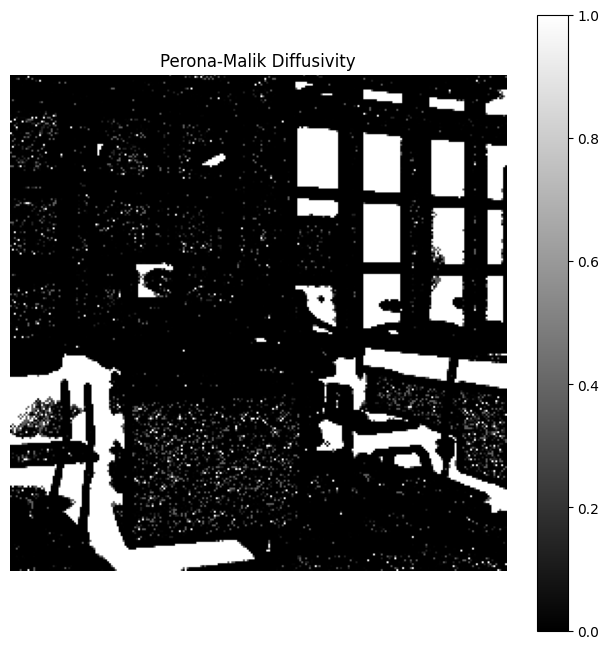

In [9]:
# Compute the gradient magnitude
grad_x = np.gradient(office_img, axis=1)
grad_y = np.gradient(office_img, axis=0)
grad_mag = np.sqrt(grad_x**2 + grad_y**2)

# Set the lambda value
lambda_val = 0.5

# Compute the Perona-Malik diffusivity
diffusivity = np.exp(-(grad_mag / lambda_val)**2)

# Visualize the diffusivity as a grayscale image
plt.figure(figsize=(8, 8))
plt.imshow(diffusivity, cmap='gray')
plt.title('Perona-Malik Diffusivity')
plt.axis('off')
plt.colorbar()
plt.show()

changing perona-malik diffusion default parameters

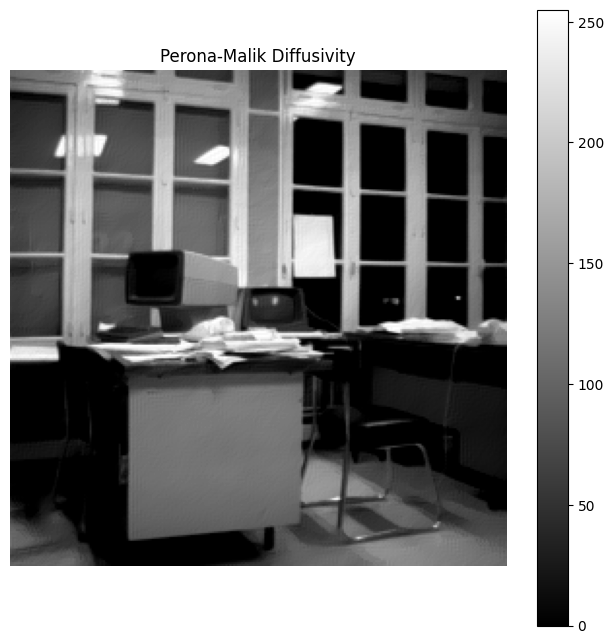

In [14]:
import numpy as np
from scipy.ndimage import gaussian_filter

def perona_malik_diffusion(image, k, lam, num_iterations):

    # Make a copy of the input image
    diffused_image = np.copy(image)

    for _ in range(num_iterations):
        # Compute the image gradients
        dx = np.gradient(diffused_image, axis=1)
        dy = np.gradient(diffused_image, axis=0)

        # Compute the gradient magnitude
        grad_mag = np.sqrt(dx**2 + dy**2)

        # Compute the Perona-Malik diffusivity
        diffusivity = 1.0 / (1.0 + (grad_mag / k)**2)

        # Apply the Perona-Malik diffusion
        dx_diffused = lam * dx * diffusivity
        dy_diffused = lam * dy * diffusivity
        diffused_image[1:, 1:] = (
            diffused_image[1:, 1:] +
            dx_diffused[:-1, 1:] -
            dx_diffused[1:, :-1] +
            dy_diffused[1:, :-1] -
            dy_diffused[:-1, 1:]
        )

    return diffused_image

# Example usage
input_image = np.random.rand(512, 512)
k = 2
lam = 0.2
num_iterations = 10

output_image = perona_malik_diffusion(np.array(office_img), k, lam, num_iterations)

plt.figure(figsize=(8, 8))
plt.imshow(output_image, cmap='gray')
plt.title('Perona-Malik Diffusivity')
plt.axis('off')
plt.colorbar()
plt.show()

Compute the Perona-Malik diffusivity with Changed parameters on noisy office picture

In [15]:
from google.colab import files
uploaded = files.upload()

Saving office_noisy.png to office_noisy.png


In [16]:
# Load the "office" image
office_img = Image.open('office_noisy.png')
office_img = np.array(office_img)

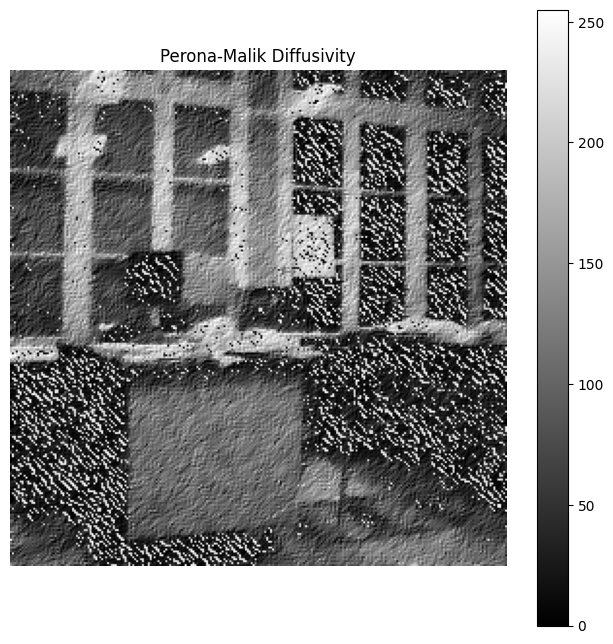

In [19]:
import numpy as np
from scipy.ndimage import gaussian_filter

def perona_malik_diffusion(image, k, lam, num_iterations):

    # Make a copy of the input image
    diffused_image = np.copy(image)

    for _ in range(num_iterations):
        # Compute the image gradients
        dx = np.gradient(diffused_image, axis=1)
        dy = np.gradient(diffused_image, axis=0)

        # Compute the gradient magnitude
        grad_mag = np.sqrt(dx**2 + dy**2)

        # Compute the Perona-Malik diffusivity
        diffusivity = 1.0 / (1.0 + (grad_mag / k)**2)

        # Apply the Perona-Malik diffusion
        dx_diffused = lam * dx * diffusivity
        dy_diffused = lam * dy * diffusivity
        diffused_image[1:, 1:] = (
            diffused_image[1:, 1:] +
            dx_diffused[:-1, 1:] -
            dx_diffused[1:, :-1] +
            dy_diffused[1:, :-1] -
            dy_diffused[:-1, 1:]
        )

    return diffused_image

# Example usage
input_image = np.random.rand(512, 512)
k = 20
lam = 0.2
num_iterations = 20

output_image = perona_malik_diffusion(np.array(office_img), k, lam, num_iterations)

plt.figure(figsize=(8, 8))
plt.imshow(output_image, cmap='gray')
plt.title('Perona-Malik Diffusivity')
plt.axis('off')
plt.colorbar()
plt.show()